In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

In [174]:
def make_regression_plot(X,y,x_col,y_col):
    """
    make category
    """
    # check type
    if isinstance(X[x_col][0], (str)):
        x_df = X[[x_col]]
        rotation = 0
    else:
        x_df = pd.DataFrame({x_col:pd.qcut(X[x_col],10)})
        rotation = 90
    
    # summary
    df = pd.concat([x_df, y[[y_col]]], axis=1)
    df = pd.DataFrame(df.groupby([x_col])[y_col].agg(['count','mean'])).reset_index()
    df.columns = [x_col, 'count', y_col]

    # set fig
    fig = plt.figure()

    # plot
    ax1 = df['count'].plot(kind='bar', width = 0.35, color='#437CA4')
    ax2 = df[y_col].plot(secondary_y=True, marker='o', color="#F30417")

    # plot setting
    ax = plt.gca()
    plt.rcParams["font.family"] = "Meiryo"
    plt.xlim([-width, len(df[x_col])-width])
    ax1.set_xticklabels(df[x_col], rotation=rotation)
    ax1.set_title("Average "+ y_col+ " by "+x_col)
    ax1.set_ylabel('count')
    ax2.set_ylabel(y_col)

    #save
    fig.savefig(outdir+"/"+x_col+".png")

    return None

In [ ]:
X_path = "input/X.csv"
y_path = "input/y.csv"
dir_name = "output"

# read
X = pd.read_csv(X_path, sep="\t")
y = pd.read_csv(y_path, sep="\t")
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

Species
Length1
Length2
Length3
Height
Width


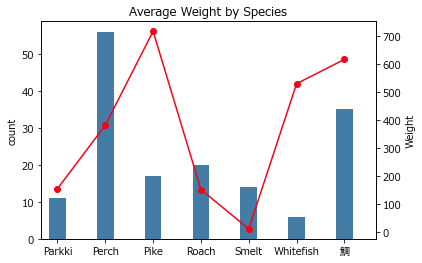

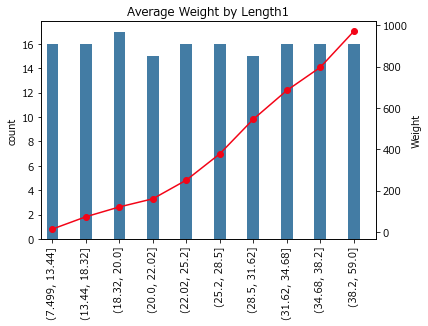

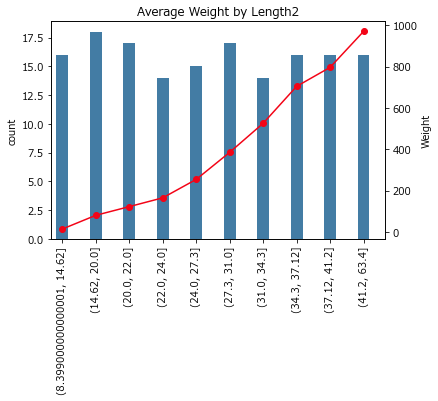

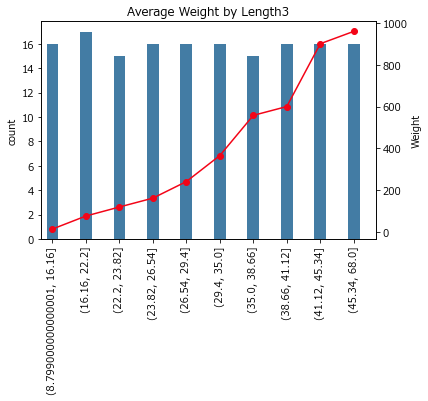

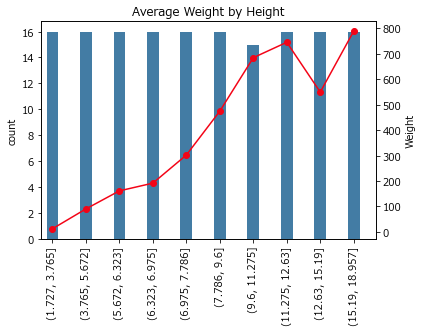

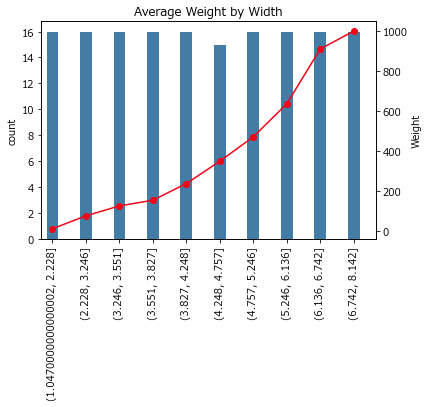

In [175]:
# set param
x_cols = X.columns
y_col = y.columns[0]
outdir = dir_name 

# make output dir
p = pathlib.Path(dir_name)
p.mkdir()

# plot loop
for x_col in x_cols:
    print(x_col)
    make_regression_plot(X,y,x_col,y_col)